In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

data = pd.read_csv('two_moons.csv')

data = data.drop("Unnamed: 0", axis=1)
print(data.shape)
data.tail()

(1000, 3)


,x_1,x_2,y
995,1.566579,-0.024554,1.0
996,0.292032,1.369826,0.0
997,0.351323,-0.533613,1.0
998,0.156315,0.080978,1.0
999,0.514015,-0.503676,1.0


In [2]:
#data.sort_values(by='y', ascending=True)
data_class_1 = data.loc[data['y'] == 1] # Dataframe dos padrões da classe 1
data_class_0 = data.loc[data['y'] == 0] # Dataframe dos padrões da classe 0
print(data_class_0.head())
data_class_1.head()

         x_1       x_2    y
2  -0.245490  1.068868  0.0
6   0.898613  0.822658  0.0
7   0.052219  1.363686  0.0
8  -0.628466  1.141305  0.0
10 -1.157106  0.504670  0.0


,x_1,x_2,y
0,2.064430,0.546069,1.0
1,1.762473,-0.062689,1.0
3,-0.174630,0.183882,1.0
4,0.452110,-0.406512,1.0
5,1.939612,0.430906,1.0


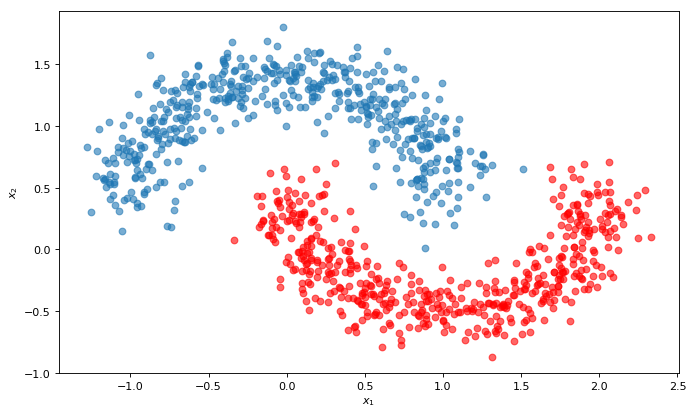

In [3]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_class_0['x_1'], data_class_0['x_2'], 'o', alpha=.6)
plt.plot(data_class_1['x_1'], data_class_1['x_2'], 'ro', alpha=.6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [4]:
teste = np.asarray(data.drop('y', axis=1))
teste_y = np.asarray(data['y'])
print(teste.shape)
print(teste_y.shape)

(1000, 2)
(1000,)


In [5]:
from collections import Counter
count = Counter(teste_y)
count

Counter({1.0: 500, 0.0: 500})

In [6]:
# Compute the number of points of class C1 as N1 and class C2 as N2
N1 = count[0]
N2 = count[1]
print("# of points from class C1:",N1)
print("# of points from class C2:",N2)

# of points from class C1: 500
# of points from class C2: 500


In [7]:
C1 = []
C1_labels = []

C2 = []
C2_labels = []

# separate inputs from class C1 and C2 in different numpy arrays
for i in range(len(teste_y)):
    y = teste_y[i]
    x = teste[i]
    if y == 0:
        C1.append(x)
        C1_labels.append(y)
    elif y == 1:
        C2.append(x)
        C2_labels.append(y)
    
C1 = np.asarray(C1)
C1_labels = np.asarray(C1_labels)
C2 = np.asarray(C2)
C2_labels = np.asarray(C2_labels)

print(C1.shape, C1_labels.shape)

(500, 2) (500,)


In [8]:
# compute the mean vector for each of the 2 classes
# compute the mean accros the Bash size dimension
m1 = np.mean(C1,axis=0)
m2 = np.mean(C2,axis=0)
print(m1, m2)

[-0.00174703  1.03675024] [ 1.00541181 -0.14052539]


In [9]:
# total within-class covariance matrix, given by (4.27)
print("Input vector shape:",C1.shape)
print("m1.shape",m1.shape)

tmp = np.subtract(C1, m1)
a = np.dot(tmp.T, tmp)

tmp = np.subtract(C2, m2)
b = np.dot(tmp.T, tmp)
SW = np.add(a,b)

print("Output:",SW)

Input vector shape: (500, 2)
m1.shape (2,)
Output: [[ 5.21783589e+02 -2.68249071e-02]
 [-2.68249071e-02  1.19062707e+02]]


In [10]:
from numpy.linalg import pinv
inv_SW = pinv(SW)
s = m2 - m1
W = np.dot(inv_SW, np.expand_dims(s,1)) # 
print(W)

[[ 0.00192971]
 [-0.00988743]]


In [11]:
print("Input shape:",teste.shape)
y_hat = np.dot(teste,W)
print(y_hat.shape)
y_hat

Input shape: (1000, 2)
(1000, 1)


array([[-1.41545759e-03],
       [ 4.02090599e-03],
       [-1.10420801e-02],
       [-2.15510375e-03],
       [ 4.89180281e-03],
       [-5.17653826e-04],
       [-6.39990007e-03],
       [-1.33825764e-02],
       [-1.24973298e-02],
       [ 7.33689484e-03],
       [-7.22277126e-03],
       [-2.41164241e-03],
       [ 8.63113954e-03],
       [-1.11862382e-02],
       [ 3.89442930e-04],
       [-5.81268975e-03],
       [ 2.38560511e-03],
       [-9.61862036e-03],
       [-4.85058299e-03],
       [-7.63618790e-03],
       [-5.94917865e-03],
       [-7.48127983e-03],
       [-1.18262528e-02],
       [-1.41792774e-02],
       [ 5.68924312e-03],
       [ 6.13207117e-03],
       [-2.74334105e-03],
       [-8.53191654e-03],
       [ 5.64566323e-03],
       [-3.49710509e-03],
       [ 6.81464961e-03],
       [ 4.92705664e-03],
       [ 1.74641817e-03],
       [ 9.21893675e-03],
       [-1.07379237e-02],
       [ 6.87236844e-03],
       [ 6.61765559e-05],
       [-1.19296501e-02],
       [ 1.9

In [12]:
tot = 0
for m in [m1,m2]:
    tot += np.dot(np.squeeze(W), m)
    print(tot)
    

w0 = 0.5 * tot
#w0 = 0.2
print("Optimal threshold:",w0)

-0.01025416393662476
-0.006924571153295344
Optimal threshold: -0.003462285576647672


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(teste, teste_y)
print("Accuracy:",clf.score(teste,teste_y))

Accuracy: 0.951


In [14]:
data.tail()

,x_1,x_2,y
995,1.566579,-0.024554,1.0
996,0.292032,1.369826,0.0
997,0.351323,-0.533613,1.0
998,0.156315,0.080978,1.0
999,0.514015,-0.503676,1.0


In [15]:
W =np.subtract(m2,m1)
print("Weights:",W)

Weights: [ 1.00715884 -1.17727563]


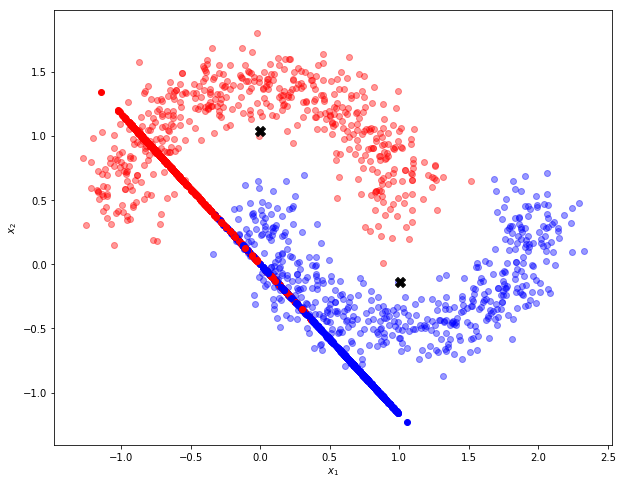

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
colors=['red','blue']
for point, pred in zip(teste,teste_y):
    plt.scatter(point[0],point[1], color=colors[int(pred)], alpha=0.4)
    proj = np.dot(point,W)/np.dot(W,W) * W
    y = np.dot(point,W)
    ax.scatter(proj[0],proj[1],color=colors[int(pred)])

    
ax.scatter(m1[0],m1[1],color='black',s=100,marker="X")
ax.scatter(m2[0],m2[1],color='black',s=100,marker="X")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

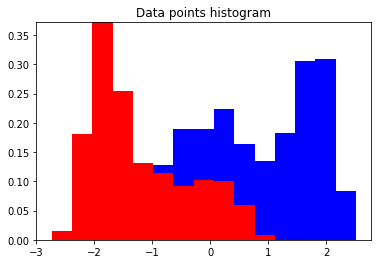

In [17]:
yA = np.squeeze(np.dot(C1,np.expand_dims(W,1)))
yB = np.squeeze(np.dot(C2,np.expand_dims(W,1)))

#np.random.seed(0)

n_bins = 15

fig, axes = plt.subplots(nrows=1, ncols=1)

colors = ['red', 'blue']
axes.hist([yA,yB], n_bins, density=1, color=colors, histtype='bar', stacked=True)
axes.set_title('Data points histogram')

plt.show()

In [18]:
v_recalls = []
fp_tx = []
v_acc = []
f1_score = []
threshold = np.linspace(-.01,0,100)
for w0 in threshold:
    predictions = []
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for pred in y_hat:
        if pred < w0:
            predictions.append(0)
        else:
            predictions.append(1)

    for pred, i in zip(predictions,teste_y):
        if pred == 0:
            if pred == i:
                true_negatives +=1
            else:
                false_negatives +=1
        else:
            if pred == i:
                true_positives +=1
            else:
                false_positives +=1

    # Acurácia:
    acc = (true_positives + true_negatives) / len(teste_y)
    print(acc)
    # Precisão:
    try:
        precision = true_positives / (true_positives + false_positives)
    except ZeroDivisionError:
        precision = 0

    # Taxa de falso positivo:
    FP_tx = false_positives / (true_negatives + false_positives)

    # RECALL: Proporção de amostras da classe positiva corretamente classificadas:
    recall = true_positives / (true_positives + false_negatives)
    
    # F1-Score:
    try:
        f1 = (2*recall*precision)/(recall + precision)
    except ZeroDivisionError:
        f1 = 0
    
    #print("#"*10)
    #print("Threshold:", w0)
    #print("Accurácia:", acc)
    #print("Precisão:", precision)
    #print("Recall:", recall)
    #print("F1-medida:", f1)
    v_recalls.append(recall)
    fp_tx.append(FP_tx)
    v_acc.append(acc)
    f1_score.append(f1)
    


0.79
0.8
0.807
0.808
0.811
0.814
0.821
0.822
0.823
0.824
0.83
0.834
0.841
0.843
0.844
0.849
0.852
0.855
0.86
0.862
0.864
0.865
0.869
0.869
0.874
0.881
0.89
0.89
0.892
0.895
0.899
0.903
0.903
0.905
0.909
0.913
0.916
0.916
0.918
0.918
0.92
0.921
0.922
0.923
0.927
0.929
0.929
0.934
0.94
0.941
0.942
0.944
0.942
0.942
0.941
0.945
0.947
0.949
0.949
0.95
0.952
0.951
0.949
0.948
0.951
0.95
0.95
0.953
0.952
0.952
0.95
0.949
0.949
0.946
0.943
0.944
0.94
0.936
0.933
0.934
0.928
0.927
0.929
0.927
0.926
0.924
0.921
0.921
0.922
0.922
0.921
0.919
0.914
0.913
0.909
0.908
0.907
0.907
0.904
0.902


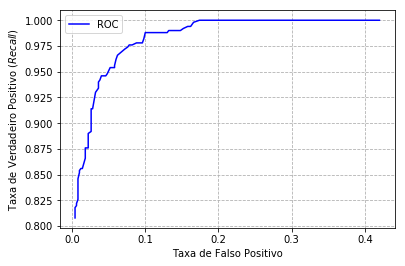

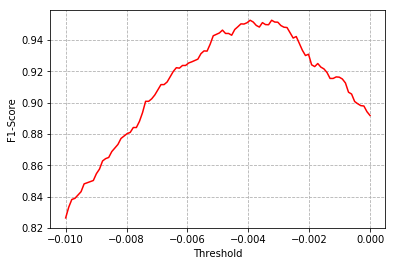

In [19]:
#fig, ax = plt.subplots(figsize=(10,6))
plt.figure(1)
#plt.subplot(211)
plt.plot(fp_tx, v_recalls, 'b-')
plt.grid(True, linestyle='--', linewidth=0.8)
plt.xlabel('Taxa de Falso Positivo')
plt.gca().legend(('ROC',))
plt.ylabel('Taxa de Verdadeiro Positivo ($Recall$)')
#threshold = np.linspace(-100,50,100)
plt.figure(2)
#plt.subplot(212)
plt.plot(threshold,f1_score, 'r-')
plt.grid(True, linestyle='--', linewidth=0.8)
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.show()    

In [20]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    w0 = 0
    return w,w0

def sigmoid(result):
    return 1/(1+np.exp(-result))

def cost_func(w, w0, X, Y):
    m = X.shape[0]
    
    # Função custo
    cost = (-1/m)*(np.sum((Y.T*np.log(sigmoid(np.dot(w,X.T)+w0))) + ((1-Y.T)*(np.log(1-sigmoid(np.dot(w,X.T)+w0))))))
    #
    
    # Gradientes
    dw = (1/m)*(np.dot(X.T, (sigmoid(np.dot(w,X.T)+w0)-Y.T).T))
    db = (1/m)*(np.sum(sigmoid(np.dot(w,X.T)+w0)-Y.T))
    
    grads = (dw, db)
    
    return grads, cost


def model_predict(w, w0, X, Y, alfa, num):
    costs = []
    for i in range(num):
        #
        grads, cost = cost_func(w,w0,X,Y)
        #
        dw = grads[0]
        db = grads[1]
        #weight update
        w = w - (alfa * (dw.T))
        w0 = w0 - (alfa * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Interação: ",i)
            #print("Valor do custo:",cost)
            
    
    #final parameters
    coeff = {"w": w, "w0": w0}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [21]:
X = data.drop('y', axis=1)
y = data['y'].values
N =  X.shape[0] # Número de amostras
n = X.shape[1] # Número de features dos padrões

W, w0 = weightInitialization(n)

#W = np.zeros((1,n))
#w0 = 0

# Gradiente Descendente
coeff, gradient, costs = model_predict(W, w0, X, y, alfa=000.1,num=4500)

# Predição final
w = coeff["w"]
w0 = coeff["w0"]
print('Pesos ótimos:', w)
print('w0 (Intercepto) ótimo:', w0)

H = sigmoid(np.dot(w,X.T)+w0)

y_hat = predict(H, N)

Pesos ótimos: [[ 1.0632669  -7.15051749]]
w0 (Intercepto) ótimo: 2.607116012339959


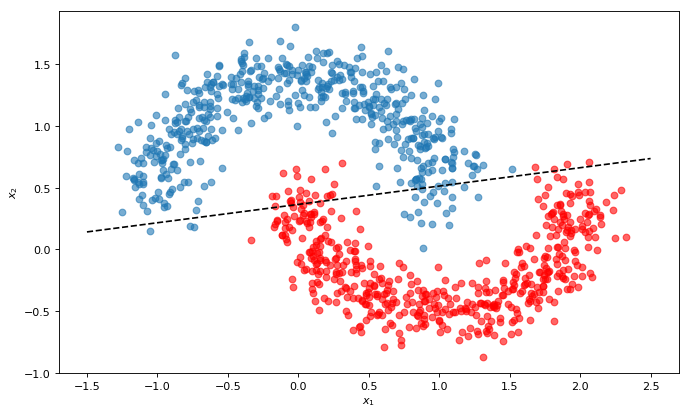

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline 

data_class_1 = data.loc[data['y'] == 1] # Dataframe dos padrões da classe 1
data_class_0 = data.loc[data['y'] == 0] # Dataframe dos padrões da classe 0
x = np.linspace(-1.5,2.5,2)
x2 = (-1/w[0][1]) * (w[0][0] * x + w0)

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_class_0['x_1'], data_class_0['x_2'], 'o', alpha=.6)
plt.plot(data_class_1['x_1'], data_class_1['x_2'], 'ro', alpha=.6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(x,x2, 'k--')

plt.show()

In [23]:
np.mean(y_hat == y.flatten()) * 100

95.1

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

# data2 = data.copy()

# def mapFeature(X1, X2):
#     degree = 1
#     out = np.ones(X.shape[0])[:,np.newaxis]
#     for i in range(1, degree+1):
#         for j in range(i+1):
#             out = np.hstack((out, np.multiply(np.power(X1, i-j),np.power(X2, j))[:,np.newaxis]))
#     return out
# X = mapFeature(data2.iloc[:,0], data2.iloc[:,1])
# y = data2.iloc[:,-1]

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

print('Parâmetros ótimos:',parameters)
print('Acurácia:',accuracy)

Parâmetros ótimos: [[ 1.01568896 -6.38090249]]
Acurácia: 0.951


C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
v_recalls = []
fp_tx = []
v_acc = []
f1_score = []
threshold = np.linspace(0,1,10)

for th in threshold:
    predictions = []
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for pred in y_hat[0]:
        if pred < th:
            predictions.append(0)
        else:
            predictions.append(1)

    for pred, i in zip(predictions,y):
        if pred == 0:
            if pred == i:
                true_negatives +=1
            else:
                false_negatives +=1
        else:
            if pred == i:
                true_positives +=1
            else:
                false_positives +=1

    # Acurácia:
    acc = (true_positives + true_negatives) / len(teste_y)
    
    
    # Precisão:
    try:
        precision = true_positives / (true_positives + false_positives)
    except ZeroDivisionError:
        precision = 0

    # Taxa de falso positivo:
    FP_tx = false_positives / (true_negatives + false_positives)

    # RECALL: Proporção de amostras da classe positiva corretamente classificadas:
    recall = true_positives / (true_positives + false_negatives)
    
    # F1-Score:
    try:
        f1 = (2*recall*precision)/(recall + precision)
    except ZeroDivisionError:
        f1 = 0
    
    print("#"*10)
    print("Threshold:", th)
    print("Accurácia:", acc)
    print("Precisão:", precision)
    print("Recall:", recall)
    print("F1-medida:", f1)
    v_recalls.append(recall)
    fp_tx.append(FP_tx)
    v_acc.append(acc)
    print(v_acc)
    f1_score.append(f1)
    print(f1_score)
    


##########
Threshold: 0.0
Accurácia: 0.5
Precisão: 0.5
Recall: 1.0
F1-medida: 0.6666666666666666
[0.5]
[0.6666666666666666]
##########
Threshold: 0.1111111111111111
Accurácia: 0.951
Precisão: 0.9555555555555556
Recall: 0.946
F1-medida: 0.9507537688442211
[0.5, 0.951]
[0.6666666666666666, 0.9507537688442211]
##########
Threshold: 0.2222222222222222
Accurácia: 0.951
Precisão: 0.9555555555555556
Recall: 0.946
F1-medida: 0.9507537688442211
[0.5, 0.951, 0.951]
[0.6666666666666666, 0.9507537688442211, 0.9507537688442211]
##########
Threshold: 0.3333333333333333
Accurácia: 0.951
Precisão: 0.9555555555555556
Recall: 0.946
F1-medida: 0.9507537688442211
[0.5, 0.951, 0.951, 0.951]
[0.6666666666666666, 0.9507537688442211, 0.9507537688442211, 0.9507537688442211]
##########
Threshold: 0.4444444444444444
Accurácia: 0.951
Precisão: 0.9555555555555556
Recall: 0.946
F1-medida: 0.9507537688442211
[0.5, 0.951, 0.951, 0.951, 0.951]
[0.6666666666666666, 0.9507537688442211, 0.9507537688442211, 0.950753768844

In [26]:
    for pred, i in zip(predictions,y):
        if pred == 0:
            if pred == i:
                true_negatives +=1
            else:
                false_negatives +=1
        else:
            if pred == i:
                true_positives +=1
            else:
                false_positives +=1

true_negatives

956

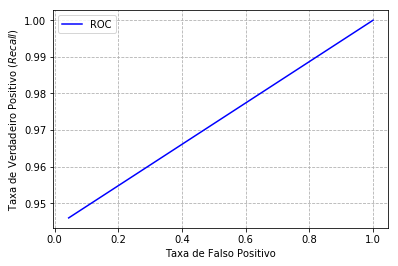

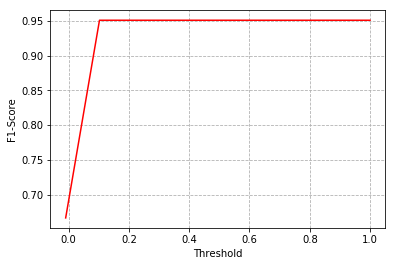

In [27]:
#fig, ax = plt.subplots(figsize=(10,6))
plt.figure(1)
#plt.subplot(211)
plt.plot(fp_tx, v_recalls, 'b-')
plt.grid(True, linestyle='--', linewidth=0.8)
plt.xlabel('Taxa de Falso Positivo')
plt.gca().legend(('ROC',))
plt.ylabel('Taxa de Verdadeiro Positivo ($Recall$)')
#threshold = np.linspace(-100,50,100)
plt.figure(2)
#plt.subplot(212)
threshold = np.linspace(-.01,1,10)
plt.plot(threshold,f1_score, 'r-')
plt.grid(True, linestyle='--', linewidth=0.8)
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.show()    
